In [1]:
import numpy as np
from sklearn import linear_model,datasets
import matplotlib.pyplot as plt
import pandas as pd
df1=pd.read_csv('2017RankingEngg.csv')
df2=pd.read_csv('2018RankingEngg.csv')
df3=pd.read_csv('2019RankingEngg1.csv')
df1.insert(0,'Rank',range(1,1+len(df1)))
df2.insert(0, 'Rank', range(1, 1 + len(df2)))
df3.insert(0, 'Rank', range(1, 1 + len(df3)))
# df3 = df3.drop(labels=range(100, len(df3)), axis=0)

#preprocessing step in the data mining and data analysis process that takes raw data and
#  transforms it into a format that can be understood and analyzed by computers and machine learning

# new feature matrix consisting of all polynomial combinations of the features with
#  degree less than or equal to the specified degree
from sklearn.preprocessing import PolynomialFeatures

score2,score3,score1=[] ,[] ,[]

#tlr-teaching learning resource
#rpc - reasearch and professional practice
#go= graduation outcome
#oi- outreach and inclusivity
#ppn - perception
#2017
tlr1=(list(df1['TLR (100)']))
rpc1=(list(df1['RPC (100)']))
go1=(list(df1['GO (100)']))
oi1=(list(df1['OI (100)']))
ppn1=(list(df1['PERCEPTION (100)']))
m1=max(list(df1['TLR (100)']))
m2=max(list(df1['RPC (100)']))
m3=max(list(df1['GO (100)']))
m4=max(list(df1['OI (100)']))
m5=max(list(df1['PERCEPTION (100)']))

for i in range(0,len(df1)):
    tlr1[i]/=m1
    rpc1[i]/=m2
    go1[i]/=m3
    oi1[i]/=m4
    ppn1[i]/=m5

#2018
tlr2=(list(df2['TLR (100)']))
rpc2=(list(df2['RPC (100)']))
go2=(list(df2['GO (100)']))
oi2=(list(df2['OI (100)']))
ppn2=(list(df2['PERCEPTION (100)']))
m1=max(list(df2['TLR (100)']))
m2=max(list(df2['RPC (100)']))
m3=max(list(df2['GO (100)']))
m4=max(list(df2['OI (100)']))
m5=max(list(df2['PERCEPTION (100)']))

for i in range(0,len(df2)):
    tlr2[i]/=m1
    rpc2[i]/=m2
    go2[i]/=m3
    oi2[i]/=m4
    ppn2[i]/=m5

#2019
tlr3=(list(df3['TLR (100)']))
rpc3=(list(df3['RPC (100)']))
go3=(list(df3['GO (100)']))
oi3=(list(df3['OI (100)']))
ppn3=(list(df3['PERCEPTION (100)']))
m1=max(list(df3['TLR (100)']))
m2=max(list(df3['RPC (100)']))
m3=max(list(df3['GO (100)']))
m4=max(list(df3['OI (100)']))
m5=max(list(df3['PERCEPTION (100)']))

for i in range(0,len(df3)):
    tlr3[i]/=m1
    rpc3[i]/=m2
    go3[i]/=m3
    oi3[i]/=m4
    ppn3[i]/=m5
        
    #Calculating the score
for i in range(0,len(df1)):
    score1.append(0.3*(tlr1[i]+rpc1[i])+0.2*go1[i]+0.1*(oi1[i]+ppn1[i]))
for i in range(0,len(df2)):
    score2.append(0.3*(tlr2[i]+rpc2[i])+0.2*go2[i]+0.1*(oi2[i]+ppn2[i])) 
for i in range(0,len(df3)):
    score3.append(0.3*(tlr3[i]+rpc3[i])+0.2*go3[i]+0.1*(oi3[i]+ppn3[i])) 



avg_score=[]
for i in range(100): #avg score of 2017,2018,2019
    avg_score.append((score1[i]+score2[i]+score3[i])/3)
for i in range(100,len(df3)):
    avg_score.append(score3[i])
x=np.array(avg_score)  

df_2020=pd.read_csv('2020RankingEngg.csv')
df_2020.insert(0, 'Rank', range(1, 1 + len(df_2020)))
#df_2020= df_2020.drop(labels=range(100, len(df_2020)), axis=0)


tlr=(list(df_2020['TLR (100)']))
rpc=(list(df_2020['RPC (100)']))
go=(list(df_2020['GO (100)']))
oi=(list(df_2020['OI (100)']))
ppn=(list(df_2020['PERCEPTION (100)']))
m1=max(list(df_2020['TLR (100)']))
m2=max(list(df_2020['RPC (100)']))
m3=max(list(df_2020['GO (100)']))
m4=max(list(df_2020['OI (100)']))
m5=max(list(df_2020['PERCEPTION (100)']))

for i in range(0,len(df_2020)):
    tlr[i]/=m1
    rpc[i]/=m2
    go[i]/=m3
    oi[i]/=m4
    ppn[i]/=m5

score_2020=[]
for i in range(0,len(df_2020)):
    score_2020.append(0.3*(tlr[i]+rpc[i])+0.2*go[i]+0.1*(oi[i]+ppn[i]))
 
#polynomial regression is a linear model, that’s why we import LinearRegression. 🙂  
#score_2020
from sklearn.linear_model import LinearRegression

#STEP #1: Determining the degree of the polynomial(more it is , we get best accurate curve)
PolyReg=PolynomialFeatures(degree=4)
y=df3['Rank']

#STEP #2: Creating the new features
# reshape(-1,1) transforms our numpy array x(scores) from a 1D array to a 2D array
# contains [[1,x,x2,x3,x4],[]...]
#a0+ a1x + a2x^2 + a3x^3 +a4x^4
Xpoly=PolyReg.fit_transform(x.reshape(-1,1))# x is training data scores

#STEP #3: Creating the polynomial regression model, Then we fit our model to our data:
pr=LinearRegression()
pr.fit(Xpoly,y)#y is training data rank
#pr.predict(PolyReg.fit_transform([[0.75]]))

#Now that our model is properly trained, we can put it to work by instructing it to predict
#the responses (y) based on Xpoly, and the coefficients it had estimated:

#testing the accuracy
v=pr.predict(PolyReg.fit_transform(np.array(score_2020).reshape(-1,1)))# gives v=rank (test data)using score
#print(v)

l=[i for i in range(1,170) ]
ar=[]
for i in range(169):
    ar.append(abs(v[i]-l[i])) # 2020 rank predicted using model -actual 2020 rank
    
    
import math

avg_diff = list()

for i in range(0, 169, 10):
    avg_diff.append(math.ceil(sum(ar[i:i+10])/10))
    
print(avg_diff)


import pickle
pickle.dump(pr,open("MODEL_.pkl","wb"))#polynomial regression model
pickle.dump(PolyReg,open("POLYNOMIALTRANSFORM_.pkl","wb"))

[6, 4, 3, 9, 12, 10, 6, 2, 2, 3, 6, 8, 4, 3, 4, 6, 6]


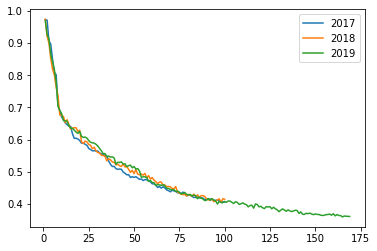

In [2]:
plt.plot(df1['Rank'],score1,label="2017")
plt.plot(df2['Rank'],score2,label="2018")
plt.plot(df3['Rank'],score3,label="2019")
plt.legend()
plt.show()

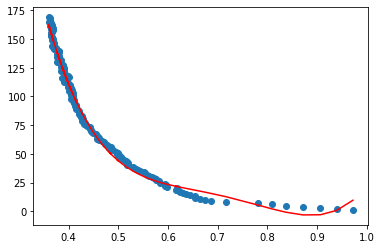

In [3]:

# visualize the polynomial regression results

# x is x_training data(score), y is y_training data (rank)
plt.scatter(x,y)# datapoints
# gives best fit curve
plt.plot(x,pr.predict(PolyReg.fit_transform(x.reshape(-1,1))),color="red")# 2nd parameter is rank predicted
plt.show()